Importing relevant Libraries

In [1]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import os
import cv2
import numpy as np

Preprocessing Image data

In [19]:
images = []
labels = []
 
path = 'data/training_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

In [21]:
X = np.array(images)
y = np.array(labels)

Encode labels in y to numeric values

In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y = le.fit_transform(y)

In [27]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state =42)

Convolution Layer

In [29]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

C:\Users\Abhinav Singh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)

Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6177 - loss: 1.3923 - val_accuracy: 0.9200 - val_loss: 0.2574
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9391 - loss: 0.1911 - val_accuracy: 0.9380 - val_loss: 0.1982
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9557 - loss: 0.1249 - val_accuracy: 0.9389 - val_loss: 0.1945
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9614 - loss: 0.1037 - val_accuracy: 0.9464 - val_loss: 0.1722
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9680 - loss: 0.0886 - val_accuracy: 0.9433 - val_loss: 0.2105
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9723 - loss: 0.0752 - val_accuracy: 0.9542 - val_loss: 0.1803
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9762 - loss: 0.0599 - val_accuracy: 0.9537 - val_loss: 0.1801
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9778 -

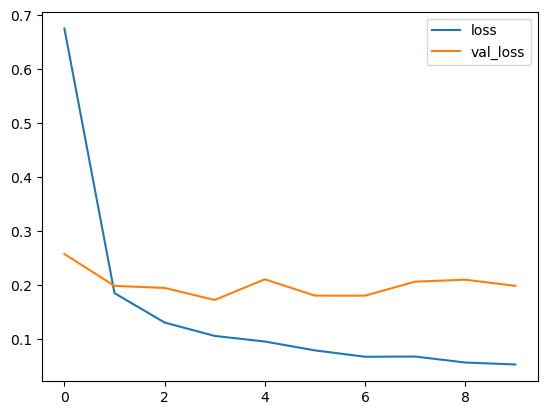

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

Pre-processing Testing Data

In [44]:
test_images = []
test_labels = []
 
path = 'data/testing_data'
 
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [46]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [48]:
preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


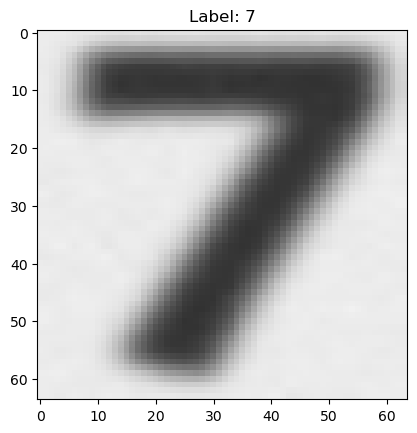

In [50]:
plt.imshow(X_test[197])
plt.title(f"Label: {predicted_labels[197]}")
plt.show()

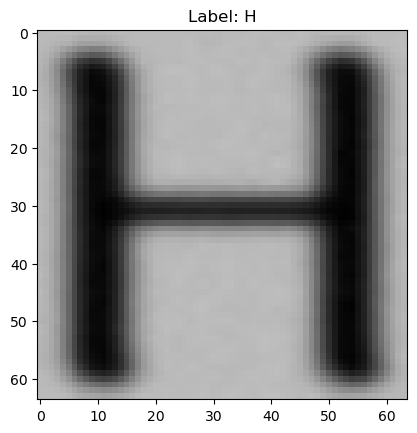

In [62]:
plt.imshow(X_test[501])
plt.title(f"Label: {predicted_labels[501]}")
plt.show()

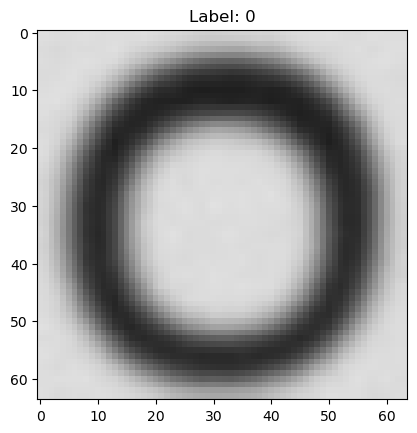

In [76]:
plt.imshow(X_test[11])
plt.title(f"Label: {predicted_labels[11]}")
plt.show()

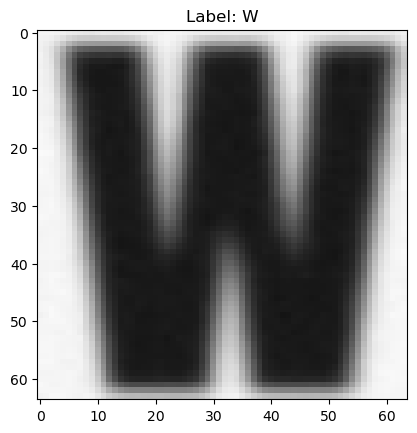

In [78]:
plt.imshow(X_test[911])
plt.title(f"Label: {predicted_labels[911]}")
plt.show()

Test Accuracy

In [52]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9797 - loss: 0.0744
Test Accuracy: 0.9632936716079712


Saving the Model

In [83]:
import joblib 
joblib.dump(model, 'OCR_model.pkl')

['OCR_model.pkl']